In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('21년 4월_ 22년 1월(총데이터).csv')
df

,date,soc,dcA,dcV,minTemp,maxTemp,차이*총량,P(kw),temp
0,2021-04-09 00:00:00,64.0,0.1,754.6,23.0,24.0,0.0,0.07546,23.5
1,2021-04-09 00:01:00,64.0,0.1,754.6,23.0,24.0,0.0,0.07546,23.5
2,2021-04-09 00:02:00,64.0,0.0,754.6,23.0,24.0,0.0,0.00000,23.5
3,2021-04-09 00:03:00,64.0,-0.1,754.6,23.0,24.0,0.0,-0.07546,23.5
4,2021-04-09 00:04:00,64.0,0.0,754.5,23.0,24.0,0.0,0.00000,23.5
...,...,...,...,...,...,...,...,...,...
351824,2022-01-28 06:46:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,20.5
351825,2022-01-28 06:47:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,20.5
351826,2022-01-28 06:48:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,20.5
351827,2022-01-28 06:49:00,40.0,0.3,717.6,21.0,20.0,0.0,0.21528,20.5


In [ ]:
df.index = pd.to_datetime(df['date'])
df= df.drop(['date'], axis=1)
df

,soc,dcA,dcV,minTemp,maxTemp,차이*총량,P(kw),temp
date,,,,,,,,
2021-04-09 00:00:00,64.0,0.1,754.6,23.0,24.0,0.0,0.07546,23.5
2021-04-09 00:01:00,64.0,0.1,754.6,23.0,24.0,0.0,0.07546,23.5
2021-04-09 00:02:00,64.0,0.0,754.6,23.0,24.0,0.0,0.00000,23.5
2021-04-09 00:03:00,64.0,-0.1,754.6,23.0,24.0,0.0,-0.07546,23.5
2021-04-09 00:04:00,64.0,0.0,754.5,23.0,24.0,0.0,0.00000,23.5
...,...,...,...,...,...,...,...,...
2022-01-28 06:46:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,20.5
2022-01-28 06:47:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,20.5
2022-01-28 06:48:00,40.0,0.2,717.6,21.0,20.0,0.0,0.14352,20.5


In [ ]:
#년 월 데이터
pr_m = pd.period_range(start = '2021-04',
                       end= None,
                       periods =10,
                      freq= 'M')
pr_m

PeriodIndex(['2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
             '2021-10', '2021-11', '2021-12', '2022-01'],
            dtype='period[M]')

#12월 예측

In [ ]:
train_set = df.loc['2021-04-09 00:00':'2021-11-30 23:59'] #4~11월
test_set = df.loc['2021-12-01 00:00':'2021-12-30 23:59'] #12월 예측
print(test_set)
print(train_set)

date
2021-12-01 00:00:00    9.0
2021-12-01 00:01:00    9.0
2021-12-01 00:02:00    9.0
2021-12-01 00:03:00    9.0
2021-12-01 00:04:00    9.0
                      ... 
2021-12-30 23:55:00    9.0
2021-12-30 23:56:00    9.0
2021-12-30 23:57:00    9.0
2021-12-30 23:58:00    9.0
2021-12-30 23:59:00    9.0
Name: soc, Length: 34952, dtype: float64
date
2021-04-09 00:00:00    64.0
2021-04-09 00:01:00    64.0
2021-04-09 00:02:00    64.0
2021-04-09 00:03:00    64.0
2021-04-09 00:04:00    64.0
                       ... 
2021-11-30 23:55:00     9.0
2021-11-30 23:56:00     9.0
2021-11-30 23:57:00     9.0
2021-11-30 23:58:00     9.0
2021-11-30 23:59:00     9.0
Name: soc, Length: 280486, dtype: float64


In [ ]:
#평균, 표준편차
train_stats = train_set.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
soc,280486.0,21.160019,17.219345,5.000,9.00000,9.0,38.00000,81.00000
dcA,280486.0,0.047287,7.658883,-30.000,-0.10000,0.0,0.10000,44.70000
dcV,280486.0,679.540724,34.018385,624.500,653.40000,659.2,715.90000,785.40000
minTemp,280486.0,22.687514,1.907357,16.000,22.00000,23.0,24.00000,34.00000
maxTemp,280486.0,22.684052,2.205481,17.000,21.00000,22.0,24.00000,32.00000
차이*총량,280486.0,-0.000248,0.185018,-38.304,0.00000,0.0,0.00000,5.98500
P(kw),280486.0,0.053177,5.380151,-20.154,-0.06533,0.0,0.07054,29.89378
temp,280486.0,22.685783,1.747359,18.000,21.50000,22.5,23.50000,31.50000


In [ ]:
#정규화 z변환
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']

#학습용 데이터 정규화
normed_train_data = norm(train_set)
#테스트용 데이터 정규화
normed_test_data = norm(test_set)

In [ ]:
#학습용 데이터 값 추출
normed_train_data = normed_train_data.values
# 테스트용 데이터 값 추출
normed_test_data = normed_test_data.values

In [ ]:
#시간 지연을 갖는 입출력 데이터 만들기
def build_dataset(ts):
  dataX = []
  dataY = []
  for i in range(0, len(ts)-1):
    _x = ts[i,:]
    _y = ts[i+1,-1]
    dataX.append(_x)
    dataY.append(_y)
  return np.array(dataX), np.array(dataY)
#x에서는 현재 시간에 따른 값을 가져오기
#Y에서는 현재 시간에 따른 다음 시간의 값을 가져오기

#학습용
normed_trainX, normed_trainY = build_dataset(normed_train_data)
#테스트용
normed_testX, normed_testY = build_dataset(normed_test_data)




In [ ]:
normed_testX, normed_testY

(array([[-7.06183597e-01,  1.99393511e-02, -7.36093837e-01, ...,
          1.33781596e-03,  1.44462457e-02, -1.82319927e+00],
        [-7.06183597e-01,  1.99393511e-02, -7.36093837e-01, ...,
          1.33781596e-03,  1.44462457e-02, -1.82319927e+00],
        [-7.06183597e-01,  1.99393511e-02, -7.36093837e-01, ...,
          1.33781596e-03,  1.44462457e-02, -1.82319927e+00],
        ...,
        [-7.06183597e-01,  1.99393511e-02, -7.77248054e-01, ...,
          1.33781596e-03,  1.43942026e-02, -1.82319927e+00],
        [-7.06183597e-01,  1.99393511e-02, -7.77248054e-01, ...,
          1.33781596e-03,  1.43942026e-02, -1.82319927e+00],
        [-7.06183597e-01,  1.99393511e-02, -7.77248054e-01, ...,
          1.33781596e-03,  1.43942026e-02, -1.82319927e+00]]),
 array([-1.82319927, -1.82319927, -1.82319927, ..., -1.82319927,
        -1.82319927, -1.82319927]))

In [ ]:
dataX = []
dataY = []

for i in range(0, len(normed_test_data)-1):
  _x = normed_test_data[i,:]
  _y = normed_test_data[i+1,-1]
  dataX.append(_x)
  dataY.append(_y)

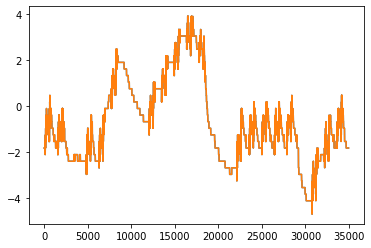

In [ ]:
plt.plot(normed_testY)
plt.plot(dataY)

예측 결과가 실제 데이터와 같은 것을 확인할수 있다.